Import

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import json
import pytz

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics

from copy import deepcopy

import h2o

C:\Users\ichsan\AppData\Local\Temp\ipykernel_336\1600760308.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
# Read the JSON file
with open('data-sample.json') as f:
    df = pd.json_normalize(json.load(f))


In [5]:
# To datetime
datetime_columns = ['taskCreatedTime', 'taskCompletedTime']
df[datetime_columns] = df[datetime_columns].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S %z', utc=True).dt.tz_convert(pytz.timezone('Asia/Bangkok')))

# dtype mapping
dtype_mapping = {
    'taskLocationDone.lon': 'float64', 
    'taskLocationDone.lat': 'float64',
    'cod.amount': 'float64', 
    'cod.received': bool,
    'UserVar.weight': 'float64'
}
df = df.astype(dtype_mapping)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype                       
---  ------                         --------------  -----                       
 0   taskCreatedTime                8334 non-null   datetime64[ns, Asia/Bangkok]
 1   taskAssignedTo                 8333 non-null   object                      
 2   taskCompletedTime              7566 non-null   datetime64[ns, Asia/Bangkok]
 3   taskStatus                     8334 non-null   object                      
 4   flow                           8334 non-null   object                      
 5   taskId                         8334 non-null   object                      
 6   taskLocationDone.lon           7566 non-null   float64                     
 7   taskLocationDone.lat           7566 non-null   float64                     
 8   cod.amount                     2358 non-null   float64                     
 9

In [7]:
df.describe()

,taskLocationDone.lon,taskLocationDone.lat,cod.amount,UserVar.weight
count,7566.000000,7566.000000,2.358000e+03,8334.000000
mean,75.355852,-3.610514,1.911411e+05,2.448298
std,52.492016,3.647171,2.723770e+05,6.188171
min,0.000000,-10.493658,8.370000e+02,0.000000
25%,0.000000,-7.061575,6.100000e+04,1.000000
50%,106.843097,-3.329263,1.533750e+05,1.000000
75%,112.182877,0.000000,2.350000e+05,1.600000
max,140.806424,5.564040,4.730000e+06,202.500000


# Pandas Profiling

In [8]:
# df_report = ProfileReport(df)
# df_report

Drop unused columns

In [9]:
# Drop constant values and ID
df.drop(columns=['flow', 'taskId'], inplace=True)

# Drop ID
df.drop(columns=['UserVar.taskStatus', 'UserVar.taskDetailStatus', 'UserVar.taskDetailStatusLabel'], inplace=True)

Drop duplicates

In [10]:
df.drop_duplicates(inplace=True)

Drop ongoing task

In [11]:
# df.dropna(subset=['UserVar.taskStatusLabel'], inplace=True)

In [12]:
# df = df[df['taskStatus'] == 'done']
df.loc[df['taskStatus'] == 'ongoing', 'UserVar.taskStatusLabel'] = 'Ongoing'
df.drop(columns=['taskStatus'], inplace=True)


Fillna

In [13]:
df['UserVar.branch_origin'].fillna('UNKNOWN', inplace=True)
# df['cod.amount'].fillna(0, inplace=True) # Assumptions: no COD is 0

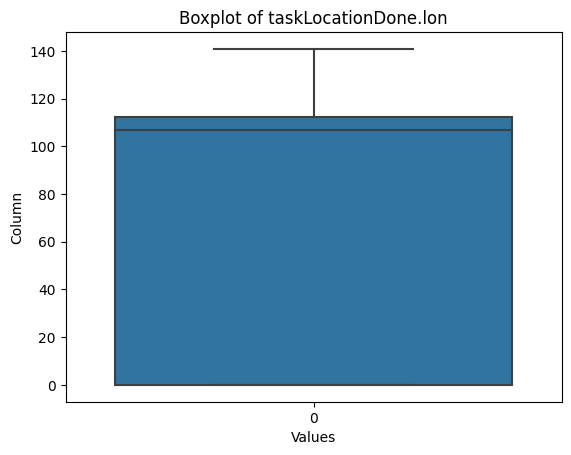

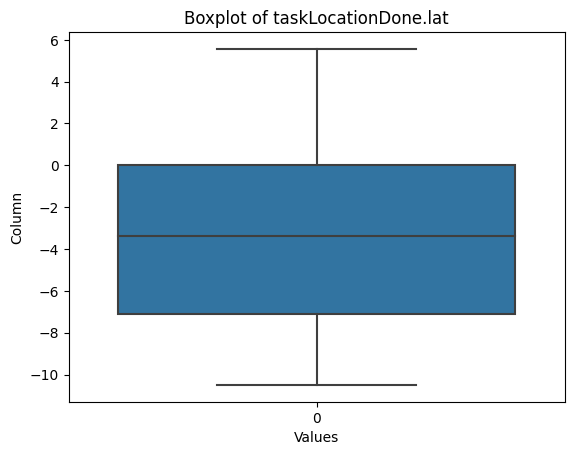

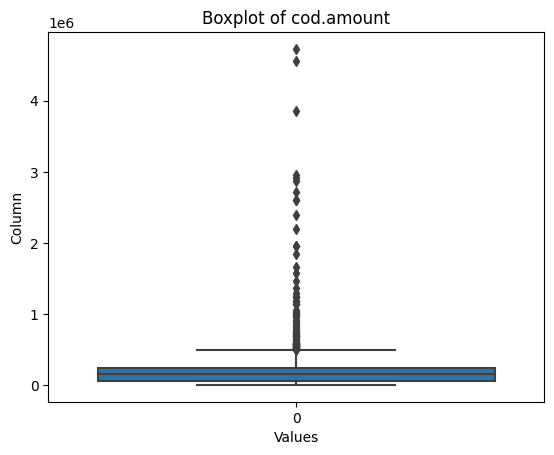

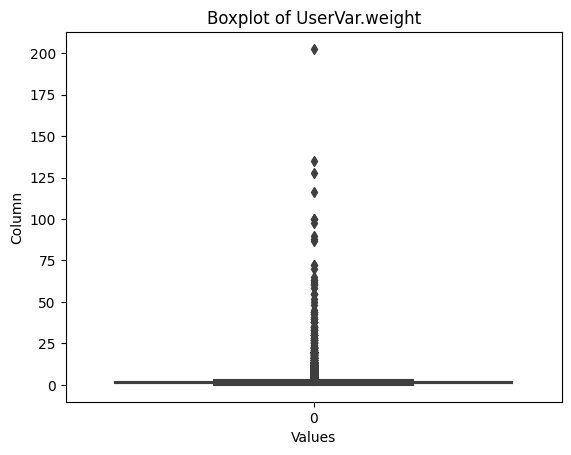

In [14]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number')

# Iterate over each numeric column
for column in numeric_columns.columns:
    # Create a new figure for each column
    plt.figure()
    
    # Create the boxplot for the current column
    sns.boxplot(data=numeric_columns[column])
    
    # Set plot title and labels
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.ylabel('Column')
    
    # Display the plot
    plt.show()

Final profiling

In [15]:
df.to_csv('to_ml.csv', index=False)
df_after = deepcopy(df)

In [16]:
# Final profiling
df_report = ProfileReport(df)
df_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

In [17]:
# Check unique values
object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in taskAssignedTo:
['pacifiedLion0' 'peacefulTacos6' 'giddyCockatoo1' ... 'culturedPorpoise0'
 'ferventBoa6' 'murkyThrushe3']

Unique values in UserVar.branch_dest:
['SRG' 'MGL' 'PWT' 'CLG' 'PDG' 'BTJ' 'DTB' 'SMI' 'PKU' 'BDO' 'BTG' 'JBR'
 'BKS' 'CXP' 'SOC' 'MES' 'TKG' 'JOG' 'MXG' 'PNK' 'CBN' 'TGL' 'DJB' 'BPN'
 'BKI' 'GTO' 'MDN' 'MDC' 'KOE' 'PLM' 'SUB' 'CKR' 'UPG' 'DJJ' 'PLW' 'DPS'
 'AMQ' 'BDJ' 'BOO' 'CGK' 'TTE' 'MJK' 'AMI' 'TGR' 'KDI' 'PGK' 'BTH' 'TSM'
 'TIM' 'KDR' 'SOQ' 'PSR' 'MKQ' 'KRW' 'SMD' 'TRK' 'PBL' 'SDA' 'PKY' 'DPK'
 'TJQ' 'TNJ']

Unique values in UserVar.taskStatusLabel:
['Success' 'Ongoing' 'Failed']

Unique values in UserVar.receiver_city:
['BATANG ,KAB BATANG' 'PURWODADI,PURWOREJO' 'BAGELEN,PURWOREJO' ...
 'MEDAN KOTA,MEDAN' 'DENDANG,MUARASABAK' 'KOTA BANTUL']

Unique values in UserVar.branch_origin:
['CGK' 'UNKNOWN' 'JOG' 'PDG' 'BDO' 'MES' 'CBN' 'DPK' 'SUB' 'CLG' 'UPG'
 'TSM' 'TKG' 'SOC' 'PWT' 'TGR' 'BTJ' 'TGL' 'PKU' 'SRG' 'KOE' 'KDR' 'DJB'
 'PNK' 'SMD' 'BOO'

Task Status

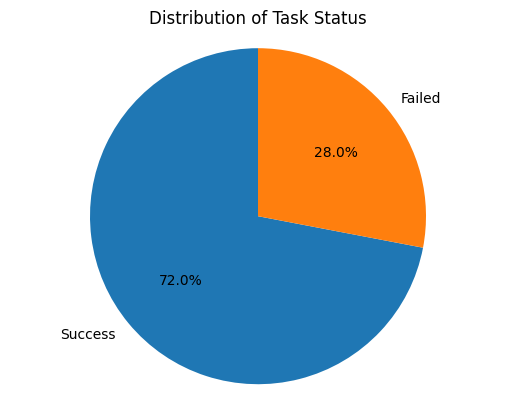

In [18]:
# Count the number
attrited_count = df[df['UserVar.taskStatusLabel'] == 'Success'].shape[0]
existing_count = df[df['UserVar.taskStatusLabel'] == 'Failed'].shape[0]

# Create labels and counts for the pie chart
labels = ['Success', 'Failed']
counts = [attrited_count, existing_count]

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Task Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Distribution of COD Amount

In [19]:
df_success = df[df['UserVar.taskStatusLabel'] == 'Success']
df_failed = df[df['UserVar.taskStatusLabel'] == 'Failed']

<Axes: xlabel='cod.amount', ylabel='Count'>

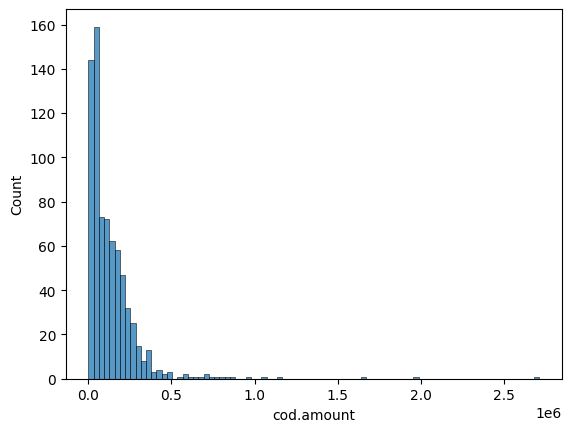

In [20]:
sns.histplot(data=df_success, x='cod.amount')

<Axes: xlabel='cod.amount', ylabel='Count'>

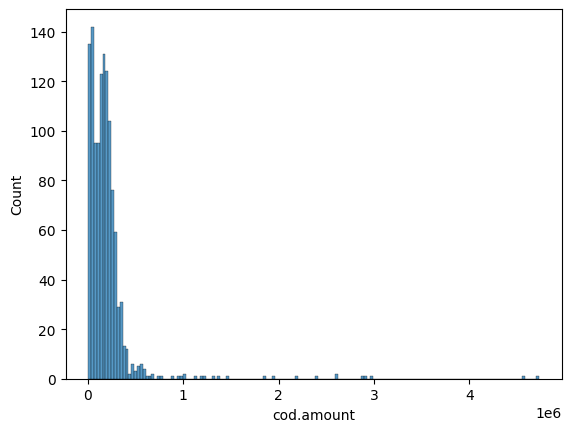

In [21]:
sns.histplot(data=df_failed, x='cod.amount')

<Axes: xlabel='cod.amount', ylabel='Count'>

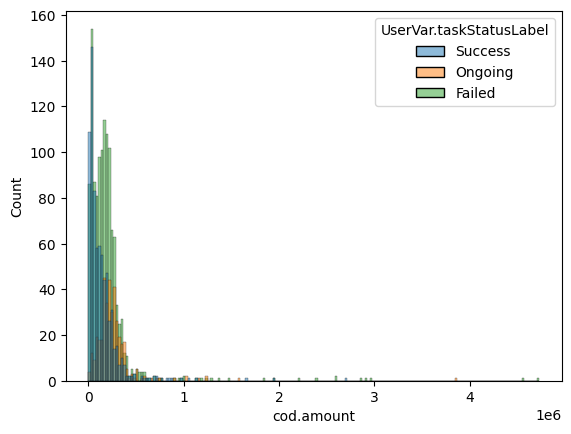

In [22]:
sns.histplot(data=df, x='cod.amount', hue='UserVar.taskStatusLabel')

<Axes: xlabel='UserVar.weight', ylabel='Count'>

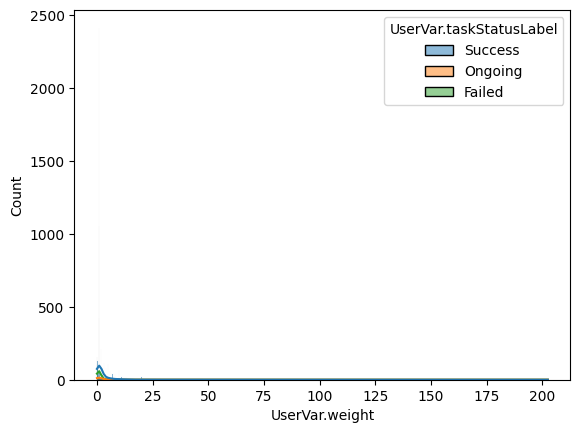

In [23]:
sns.histplot(data=df, x='UserVar.weight', hue='UserVar.taskStatusLabel', kde=True)

skew data, many outlier

## Time Analysis

Daily Task Count

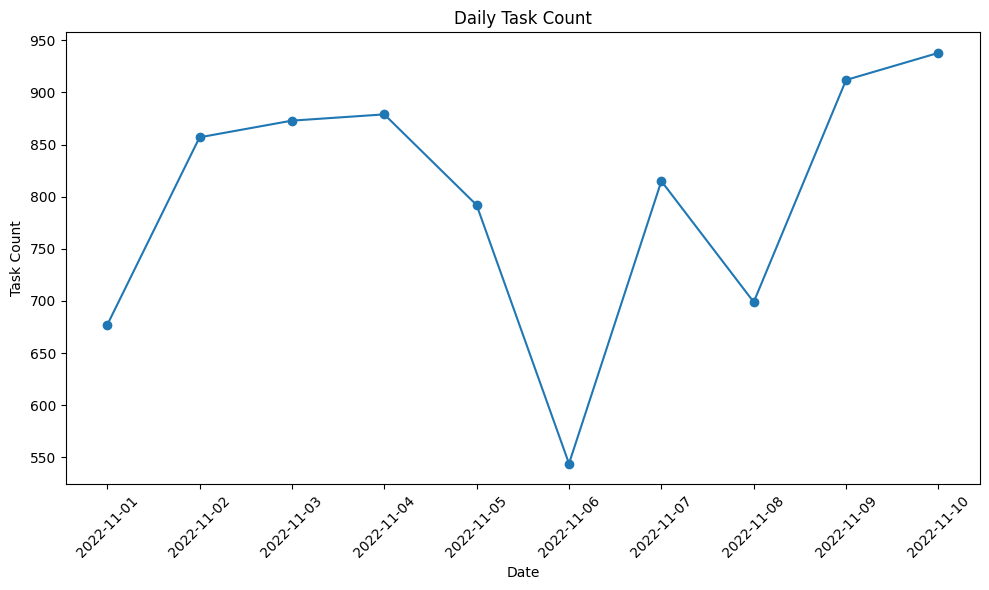

In [24]:
task_count_by_day = df.groupby(df['taskCreatedTime'].dt.date).size().reset_index(name='Task Count')

plt.figure(figsize=(10, 6))
plt.plot(task_count_by_day['taskCreatedTime'], task_count_by_day['Task Count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Task Count')
plt.title('Daily Task Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hourly Task Count

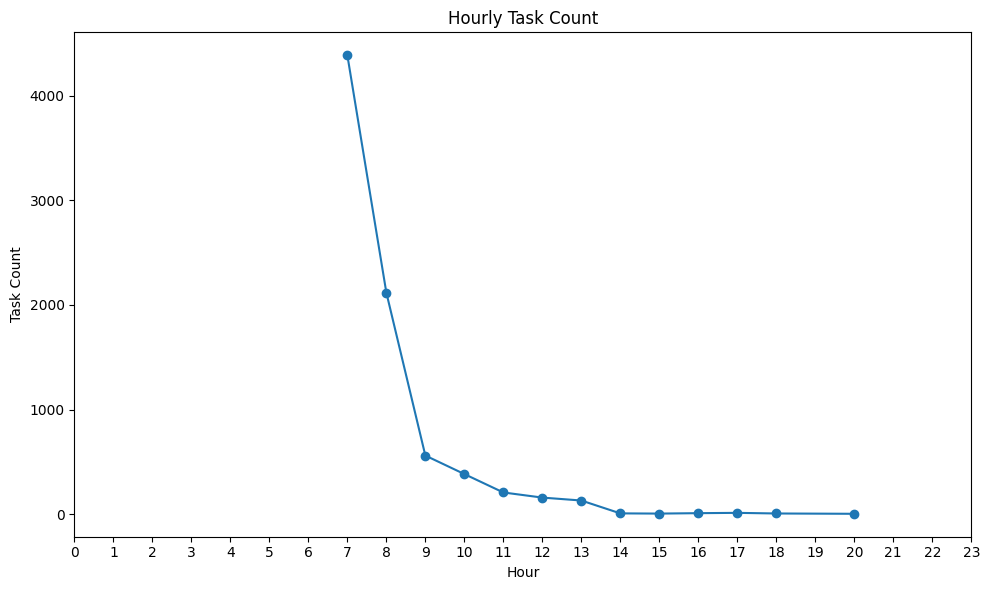

In [25]:
df_hour = df.copy()
df_hour['Hour'] = df_hour['taskCreatedTime'].dt.hour

# Step 3: Calculate the count of tasks for each hour
hourly_task_count = df_hour.groupby('Hour')['taskCreatedTime'].count()

# Step 4: Plot the hourly task count
plt.figure(figsize=(10, 6))
plt.plot(hourly_task_count.index, hourly_task_count.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Task Count')
plt.title('Hourly Task Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

Daily Task Count "Success vs Fail"

<Figure size 1000x600 with 0 Axes>

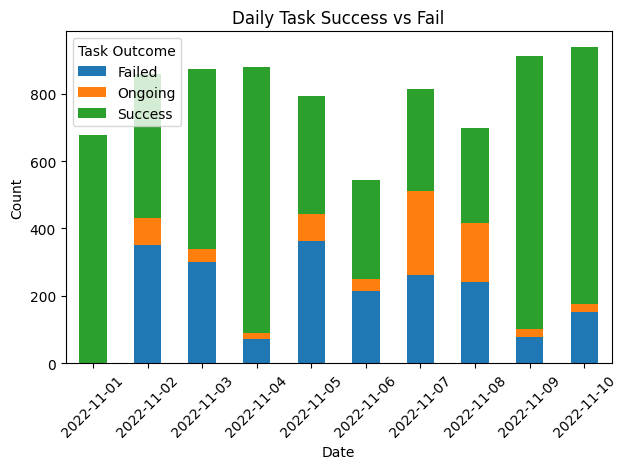

In [26]:
daily_task_outcome = df.groupby(df['taskCreatedTime'].dt.date)['UserVar.taskStatusLabel'].value_counts().unstack().fillna(0)

# Step 4: Plot the daily task success vs fail
plt.figure(figsize=(10, 6))
daily_task_outcome.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Task Success vs Fail')
plt.xticks(rotation=45)
plt.legend(title='Task Outcome')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

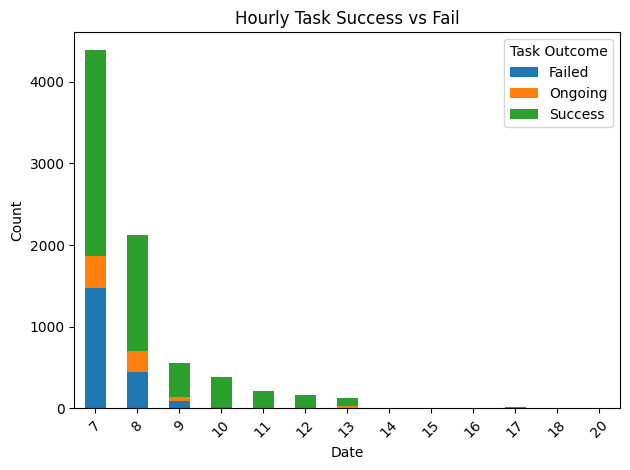

In [27]:
daily_task_outcome = df_hour.groupby(df_hour['Hour'])['UserVar.taskStatusLabel'].value_counts().unstack().fillna(0)

# Step 4: Plot the hourly task success vs fail
plt.figure(figsize=(10, 6))
daily_task_outcome.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hourly Task Success vs Fail')
plt.xticks(rotation=45)
plt.legend(title='Task Outcome')
plt.tight_layout()
plt.show()

Average Task Completion Time per Day

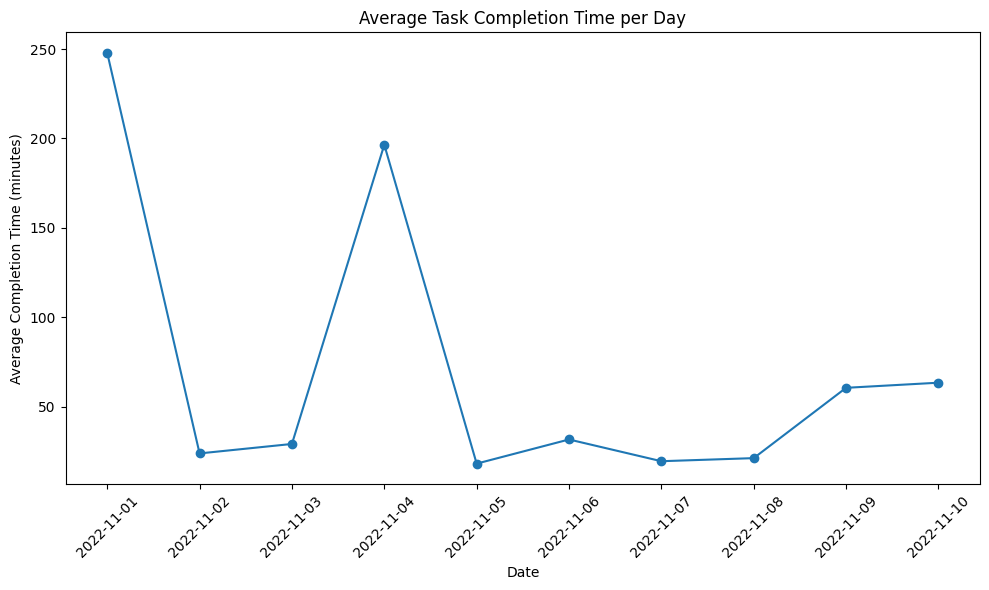

In [28]:
# Calculate the task completion time in hours
df['completion_time_minutes'] = (df['taskCompletedTime'] - df['taskCreatedTime']).dt.total_seconds() / 60

# Group the data by task creation date and calculate the average completion time per day
average_completion_time_per_day = df.groupby(df['taskCreatedTime'].dt.date)['completion_time_minutes'].mean()

df_completion_time = pd.DataFrame({'Date': average_completion_time_per_day.index,
                                   'Average Completion Time (minutes)': average_completion_time_per_day.values})

# Plot the average completion time per day
plt.figure(figsize=(10, 6))
plt.plot(df_completion_time['Date'], df_completion_time['Average Completion Time (minutes)'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Completion Time (minutes)')
plt.title('Average Task Completion Time per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task Completion Time Distribution

In [29]:
df['completion_time_minutes'].describe(include='all')

count    7257.000000
mean       74.562749
std       102.029731
min         0.250000
25%        10.783333
50%        38.433333
75%        84.000000
max       796.000000
Name: completion_time_minutes, dtype: float64

<Axes: title={'center': 'Task Completion Time Distribution'}, xlabel='completion_time_minutes', ylabel='Count'>

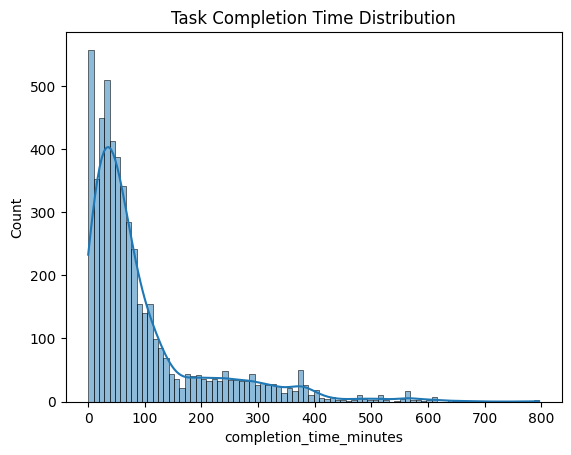

In [30]:
df_success = df[df['UserVar.taskStatusLabel'] == 'Success']
plt.title('Task Completion Time Distribution')
sns.histplot(df_success['completion_time_minutes'] , kde=True)

## Task Assignment Analysis

Most Active workers

In [31]:
worker_task_counts = df['taskAssignedTo'].value_counts()

In [32]:
# Get the top N most active workers
top_n_workers = 10  # Set the desired number of top workers
most_active_workers = worker_task_counts.head(top_n_workers)

print("Most Active Workers:")
print(most_active_workers)

Most Active Workers:
gutturalLion9       81
zestyPear3          58
emptyIcecream6      57
cautiousUnicorn6    51
artisticHyena7      51
affectedKitten8     49
excludedCheetah1    49
gloomyLlama0        49
mellowDoughnut1     46
empathicTuna3       43
Name: taskAssignedTo, dtype: int64


Most profitable workers

In [33]:
grouped_df = df.groupby('taskAssignedTo')['cod.amount', 'UserVar.weight'].agg(['sum', 'mean', 'count'])

# Sort by sum of cod.amount in descending order
top_sums = grouped_df.sort_values(by=[('cod.amount', 'sum')], ascending=False)
# top_sums
top_sums.head(20)

C:\Users\ichsan\AppData\Local\Temp\ipykernel_336\443317177.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby('taskAssignedTo')['cod.amount', 'UserVar.weight'].agg(['sum', 'mean', 'count'])


cod.amount                     UserVar.weight             \
                         sum          mean count            sum       mean   
taskAssignedTo                                                               
excludedCheetah1   9976210.0  2.494052e+05    40         58.470   1.193265   
wornoutSnail3      7699531.0  4.277517e+05    18         23.000   1.045455   
mereLocust3        7232505.0  3.806582e+05    19         21.000   1.105263   
sheepishFerret9    7159345.0  3.254248e+05    22         43.650   1.039286   
zestyPear3         6913263.0  2.304421e+05    30         78.970   1.361552   
dejectedCockatoo6  5945984.0  2.831421e+05    21         28.730   1.026071   
empathicTuna3      5283940.0  2.516162e+05    21         39.364   0.915442   
ashamedHare6       5106860.0  3.647757e+05    14        119.141   3.843258   
outlyingDoughnut6  5101775.0  3.188609e+05    16         44.260   1.526207   
jumpyQuiche8       4963413.0  2.612323e+05    19         18.060   0.950526   
offendedCow8       4778530.0  3.413236e+05    14         41.270   2.947857   
hushedLion3        4730000.0  4.730000e+06     1         28.550   4.758333   
emptyIcecream6     4711585.0  8.265939e+04    57         48.677   0.853982   
finickyPie7        4553000.0  4.553000e+06     1         62.160  62.160000   
gloomyThrushe7     4519140.0  3.476262e+05    13         11.590   0.891538   
truthfulOrange7    4489865.0  2.993243e+05    15         20.930   0.951364   
guiltyQuiche5      4105000.0  2.052500e+06     2         12.841   2.140167   
cautiousCoconut1   4060600.0  2.137158e+05    19         19.250   1.013158   
guiltyBurritos6    3948641.0  3.037416e+05    13         52.722   4.055538   
scornfulOcelot0    3852850.0  2.266382e+05    17         46.800   1.231579   

                         
                  count  
taskAssignedTo           
excludedCheetah1     49  
wornoutSnail3        22  
mereLocust3          19  
sheepishFerret9      42  
zestyPear3           58  
dejectedCockatoo6    28  
empathicTuna3        43  
ashamedHare6         31  
outlyingDoughnut6    29  
jumpyQuiche8         19  
offendedCow8         14  
hushedLion3           6  
emptyIcecream6       57  
finickyPie7           1  
gloomyThrushe7       13  
truthfulOrange7      22  
guiltyQuiche5         6  
cautiousCoconut1     19  
guiltyBurritos6      13  
scornfulOcelot0      38

In [34]:
(grouped_df[('cod.amount', 'sum')] / grouped_df[('UserVar.weight', 'sum')]).sort_values(ascending=False).head(20)

taskAssignedTo
amazedHare6         6.620000e+07
holisticMeerkat9    2.913000e+07
madPorpoise3        2.575000e+07
ecstaticDunbird3    8.599500e+06
vengefulToucan8     6.918750e+06
sugarySausage6      2.836600e+06
pluckyStork5        2.466667e+06
yearningLollies7    2.206909e+06
wearySardines5      2.090000e+06
yearningFish3       1.920000e+06
brainyBasmati9      1.595000e+06
solemnAbalone9      1.533333e+06
merePiglet2         1.462736e+06
relievedChough0     1.378567e+06
pacifiedCod1        1.312950e+06
spiritedPup5        1.154000e+06
excitedDoughnut4    1.135000e+06
aboardHeron1        1.032683e+06
thriftySausage5     1.015000e+06
hushedEggs9         9.454545e+05
dtype: float64

Distribution of Task Completion Counts

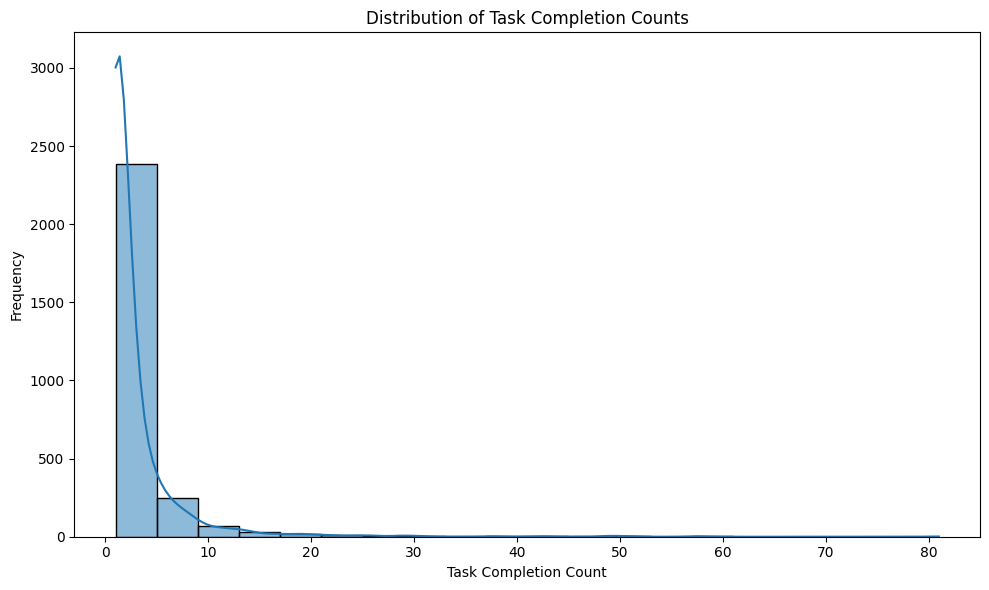

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(worker_task_counts, bins=20, kde=True)
plt.xlabel('Task Completion Count')
plt.ylabel('Frequency')
plt.title('Distribution of Task Completion Counts')
plt.tight_layout()
plt.show()

Count Completion vs Average Completion

In [36]:
worker_performance = df.groupby('taskAssignedTo')['completion_time_minutes'].mean()
correlation_df = pd.concat([worker_performance, worker_task_counts], axis=1)
correlation = correlation_df.corr()
correlation

,completion_time_minutes,taskAssignedTo
completion_time_minutes,1.000000,-0.068188
taskAssignedTo,-0.068188,1.000000


In [37]:
def compare_kdeplots(df, col, hue=None):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[df['UserVar.taskStatusLabel'] == 'Success'][col], label='Success Task', kde=True, hue=hue)
    sns.histplot(df[df['UserVar.taskStatusLabel'] == 'Failed'][col], label='Failed Task', kde=True, hue=hue)
    plt.title(f'Distribution of {col} by Customer Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [38]:
# for col in ['UserVar.branch_dest', 'UserVar.taskStatusLabel', 'UserVar.receiver_city', 
#                        'UserVar.taskDetailStatusLabel', 'UserVar.branch_origin']:
#     compare_kdeplots(df, col)

Completion time vs amount vs weight

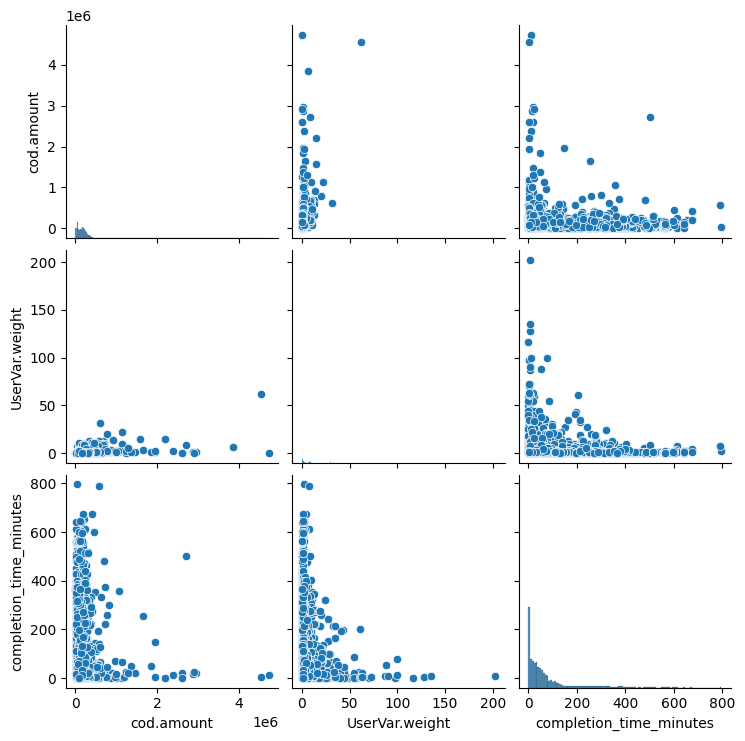

In [39]:
sns.pairplot(data=df[['cod.amount', 'UserVar.weight', 'completion_time_minutes']])

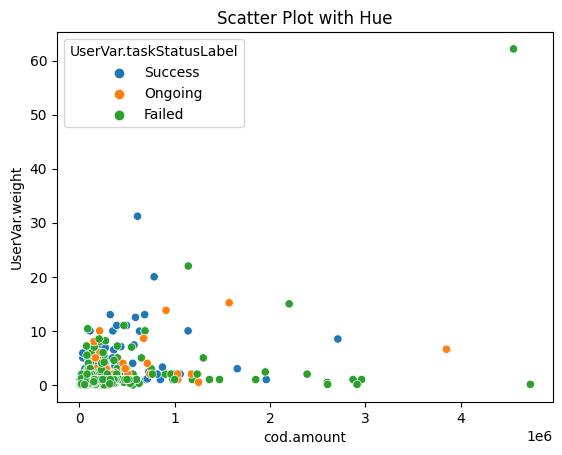

In [40]:
# Create a scatter plot with hue
sns.scatterplot(data=df, x='cod.amount', y='UserVar.weight', hue='UserVar.taskStatusLabel')

# Set plot title and labels
plt.title('Scatter Plot with Hue')

# Display the plot
plt.show()

Mapping

In [41]:
import folium

In [42]:
# # Filter relevant columns
# filtered_df = df[['taskLocationDone.lon', 'taskLocationDone.lat', 'cod.amount', 'UserVar.taskStatusLabel']]

# # Drop rows with missing values
# filtered_df.dropna(subset=['taskLocationDone.lon', 'taskLocationDone.lat'], inplace=True)

# # Create a folium map centered at the mean coordinates
# center_lat = filtered_df['taskLocationDone.lat'].mean()
# center_lon = filtered_df['taskLocationDone.lon'].mean()
# map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# # Iterate over the filtered dataframe and add markers to the map
# for _, row in filtered_df.iterrows():
#     lat = row['taskLocationDone.lat']
#     lon = row['taskLocationDone.lon']
#     amount = row['cod.amount']
#     status = row['UserVar.taskStatusLabel']
    
#     # Create marker color based on task status
#     color = 'green' if status == 'Success' else 'red'
    
#     # Add marker to the map
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color,
#         popup=f"Amount: {amount}, Status: {status}"
#     ).add_to(map)

# # Display the map
# map.save('map.html')

# Predict Task tatus

In [43]:
df = deepcopy(df_after)

In [44]:
df.isnull().sum()

taskCreatedTime               0
taskAssignedTo                1
taskCompletedTime           729
taskLocationDone.lon        729
taskLocationDone.lat        729
cod.amount                 5643
cod.received                  0
UserVar.branch_dest           0
UserVar.taskStatusLabel       0
UserVar.receiver_city        51
UserVar.weight                0
UserVar.branch_origin         0
dtype: int64

In [45]:
df.dropna(subset=['taskAssignedTo'], inplace=True)

In [46]:
df['taskCompletedTime'].fillna(df['taskCreatedTime'], inplace=True)

In [47]:
col = ['taskLocationDone.lon', 'taskLocationDone.lat', 'cod.amount']
df[col] = df[col].fillna(0)

In [48]:
col = ['UserVar.receiver_city']
df[col] = df[col].fillna('UNKNOWN')

In [49]:
df.isnull().sum()

taskCreatedTime            0
taskAssignedTo             0
taskCompletedTime          0
taskLocationDone.lon       0
taskLocationDone.lat       0
cod.amount                 0
cod.received               0
UserVar.branch_dest        0
UserVar.taskStatusLabel    0
UserVar.receiver_city      0
UserVar.weight             0
UserVar.branch_origin      0
dtype: int64

# Feature Engineering

In [50]:
df = df[df['UserVar.taskStatusLabel'] != 'Ongoing']

In [51]:
df.dtypes

taskCreatedTime            datetime64[ns, Asia/Bangkok]
taskAssignedTo                                   object
taskCompletedTime          datetime64[ns, Asia/Bangkok]
taskLocationDone.lon                            float64
taskLocationDone.lat                            float64
cod.amount                                      float64
cod.received                                       bool
UserVar.branch_dest                              object
UserVar.taskStatusLabel                          object
UserVar.receiver_city                            object
UserVar.weight                                  float64
UserVar.branch_origin                            object
dtype: object

In [52]:
# Extract additional time-based features
df['hourOfDay'] = df['taskCreatedTime'].dt.hour
df['dayOfWeek'] = df['taskCreatedTime'].dt.dayofweek
df['month'] = df['taskCreatedTime'].dt.month
df['year'] = df['taskCreatedTime'].dt.year
df['taskDuration'] = (df['taskCompletedTime'] - df['taskCreatedTime']).dt.total_seconds()

# Map boolean values to integers
df['cod.received'] = df['cod.received'].map({True: 1, False: 0})

# Other experiment
df['taskWeightDurationInteraction'] = df['UserVar.weight'] * df['taskDuration']

df.drop(['taskCreatedTime', 'taskCompletedTime'], axis=1, inplace=True)

In [53]:
# Encode binary variables
df['status'] = df['UserVar.taskStatusLabel'].map({'Success': 1, 'Failed': 0})
df.drop(columns=['UserVar.taskStatusLabel'], inplace=True)

## One Hot Encoding

In [54]:
categorical_columns = df.select_dtypes(exclude=['int','float']).columns
categorical_columns = ['taskAssignedTo', 'cod.received', 'UserVar.branch_dest', 'UserVar.receiver_city', 'UserVar.branch_origin']
categorical_columns

['taskAssignedTo',
 'cod.received',
 'UserVar.branch_dest',
 'UserVar.receiver_city',
 'UserVar.branch_origin']

In [55]:
# One hot encoding independent variable x
def encode_and_bind(original_dfframe, feature_to_encode):
    dummies = pd.get_dummies(original_dfframe[[feature_to_encode]])
    res = pd.concat([original_dfframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [56]:
for feature in categorical_columns:
    df = encode_and_bind(df, feature)

df.head()

,taskLocationDone.lon,taskLocationDone.lat,cod.amount,UserVar.weight,hourOfDay,dayOfWeek,month,year,taskDuration,taskWeightDurationInteraction,...,UserVar.branch_origin_TGL,UserVar.branch_origin_TGR,UserVar.branch_origin_TJQ,UserVar.branch_origin_TKG,UserVar.branch_origin_TNJ,UserVar.branch_origin_TRK,UserVar.branch_origin_TSM,UserVar.branch_origin_TTE,UserVar.branch_origin_UNKNOWN,UserVar.branch_origin_UPG
0,109.762910,-6.926608,685000.0,13.000,20,1,11,2022,1744.0,22672.0,...,0,0,0,0,0,0,0,0,0,0
1,110.033986,-7.876154,53500.0,1.300,8,1,11,2022,13961.0,18149.3,...,0,0,0,0,0,0,0,0,0,0
2,109.999733,-7.849777,179500.0,3.000,8,1,11,2022,18050.0,54150.0,...,0,0,0,0,0,0,0,0,0,0
3,110.003708,-7.710998,31815.0,0.625,8,1,11,2022,34632.0,21645.0,...,0,0,0,0,0,0,0,0,0,0
4,110.013887,-7.829742,144562.0,3.000,8,1,11,2022,7842.0,23526.0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.shape

(7263, 4614)

In [58]:
# Generate x and y sets
x = df.drop('status', axis=1).values
y = df['status']

Try raw model

In [59]:
# Splitting the dfset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, df['status'], test_size = 0.2, random_state=1234)

In [60]:
from xgboost import XGBClassifier

classifier = XGBClassifier(random_state=1234)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [61]:
# Predicting the test set
y_pred = classifier.predict(x_test)

# Making the confusion matrix and calculating accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9476944253269098
0.9290322505432602


## Handling Outlier

In [1]:
# TODO

## Handling imbalanced

In [62]:
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from collections import Counter

In [63]:
sm = SMOTE(sampling_strategy='auto', random_state=1234)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [64]:
print(Counter(y_train))
print(Counter(y_sm))

Counter({1: 4188, 0: 1622})
Counter({0: 4188, 1: 4188})


In [65]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=list(Counter(y_train).keys()), values=list(Counter(y_train).values()), name='Original df'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(Counter(y_sm).keys()), values=list(Counter(y_sm).values()), name='SMOTE df'),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="value+percent+name")
fig.update_layout(
    title_text="status distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Original', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='SMOTE', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [66]:
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)

steps = [('o', over), ('u', under)]

In [67]:
pipeline = Pipeline(steps=steps)

# transform the dfset
x_sm_us, y_sm_us = pipeline.fit_resample(x_train, y_train)

print(Counter(y_train))
print(Counter(y_sm_us))

Counter({1: 4188, 0: 1622})
Counter({1: 2791, 0: 1675})


In [68]:
list(Counter(y_train).keys())

[0, 1]

In [69]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=list(Counter(y_train).keys()), values=list(Counter(y_train).values()), name='Original df'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(Counter(y_sm_us).keys()), values=list(Counter(y_sm_us).values()), name='SMOTE and US df'),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="percent+name+value")
fig.update_layout(
    title_text="status distribution",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Original', x=0.16, y=0.5, font_size=12, showarrow=False),
                 dict(text='SMOTE and UnderSample', x=0.9, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [70]:
classifier = XGBClassifier(random_state=1234)
classifier.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [71]:
# Predicting the test set
y_pred = classifier.predict(x_test)

# Making the confusion matrix and calculating accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.93805918788713
0.9193748076438824


In [72]:
classifier = XGBClassifier(random_state=1234)
classifier.fit(x_sm_us, y_sm_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [73]:
# Predicting the test set
y_pred = classifier.predict(x_test)

# Making the confusion matrix and calculating accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9359944941500344
0.9245334489801629


In [74]:
# Names of the independent variables
feature_names = list(df.drop('status', axis=1).columns)

In [75]:
# Concatenate train (with resampling) and test sets to build the new dfframe 
sm_us_x = np.concatenate((x_sm_us, x_test))
sm_us_y = np.concatenate((y_sm_us, y_test))

In [76]:
sm_us_df = pd.DataFrame(np.column_stack([sm_us_y, sm_us_x]), columns=['status'] + feature_names)
sm_us_df.head()

,status,taskLocationDone.lon,taskLocationDone.lat,cod.amount,UserVar.weight,hourOfDay,dayOfWeek,month,year,taskDuration,...,UserVar.branch_origin_TGL,UserVar.branch_origin_TGR,UserVar.branch_origin_TJQ,UserVar.branch_origin_TKG,UserVar.branch_origin_TNJ,UserVar.branch_origin_TRK,UserVar.branch_origin_TSM,UserVar.branch_origin_TTE,UserVar.branch_origin_UNKNOWN,UserVar.branch_origin_UPG
0,0.0,115.197337,-8.640196,129000.0,0.10,7.0,3.0,11.0,2022.0,890.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.780049,-7.534580,0.0,5.29,8.0,2.0,11.0,2022.0,243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,106.817814,-6.703378,75500.0,0.30,7.0,6.0,11.0,2022.0,1734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,148400.0,1.00,7.0,0.0,11.0,2022.0,202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,106.806165,-6.533807,207000.0,8.50,9.0,3.0,11.0,2022.0,147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1234)
rf_clf.fit(x_sm_us, y_sm_us)

RandomForestClassifier(random_state=1234)

In [78]:
features_to_plot = 25

importances = rf_clf.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(feature_names)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

array(['UserVar.branch_dest_KDI', 'UserVar.receiver_city_SEDAN,REMBANG',
       'UserVar.branch_dest_SRG', 'taskAssignedTo_scornfulOcelot0',
       'UserVar.branch_dest_KOE', 'UserVar.branch_dest_BDO',
       'taskAssignedTo_cautiousUnicorn6',
       'UserVar.receiver_city_SEBERANG ULU I, PALE',
       'taskAssignedTo_gloomyLlama0',
       'UserVar.receiver_city_SUNGAI RAYA,KUBU RAY',
       'taskAssignedTo_artisticHyena7', 'taskAssignedTo_gutturalLion9',
       'UserVar.branch_origin_CGK', 'UserVar.branch_dest_PNK',
       'UserVar.branch_dest_CGK', 'UserVar.branch_dest_PLM',
       'UserVar.branch_dest_PGK', 'UserVar.weight',
       'taskLocationDone.lon', 'hourOfDay', 'taskLocationDone.lat',
       'dayOfWeek', 'taskWeightDurationInteraction', 'cod.amount',
       'taskDuration'], dtype='<U42')

C:\Users\ichsan\AppData\Local\Temp\ipykernel_336\1177422905.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



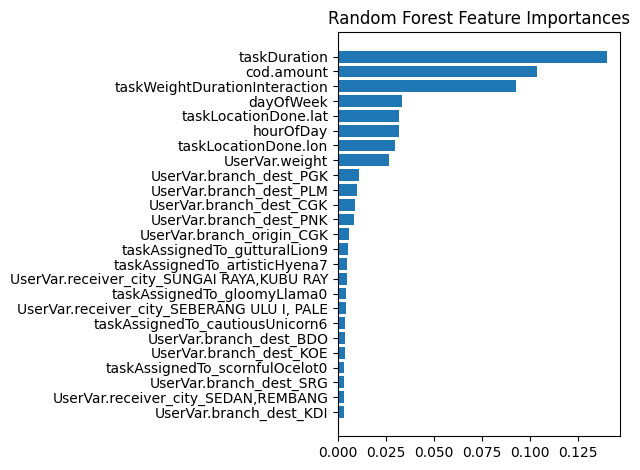

In [79]:
y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots()
ax.barh(y_ticks, values)
ax.set_yticklabels(best_vars)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

In [80]:
best_vars = best_vars[-20:]
best_vars

array(['UserVar.branch_dest_BDO', 'taskAssignedTo_cautiousUnicorn6',
       'UserVar.receiver_city_SEBERANG ULU I, PALE',
       'taskAssignedTo_gloomyLlama0',
       'UserVar.receiver_city_SUNGAI RAYA,KUBU RAY',
       'taskAssignedTo_artisticHyena7', 'taskAssignedTo_gutturalLion9',
       'UserVar.branch_origin_CGK', 'UserVar.branch_dest_PNK',
       'UserVar.branch_dest_CGK', 'UserVar.branch_dest_PLM',
       'UserVar.branch_dest_PGK', 'UserVar.weight',
       'taskLocationDone.lon', 'hourOfDay', 'taskLocationDone.lat',
       'dayOfWeek', 'taskWeightDurationInteraction', 'cod.amount',
       'taskDuration'], dtype='<U42')

## Auto ML with H2O

In [81]:
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-11.0.14.1+1 (build 11.0.14.1+1, mixed mode)
  Starting server from C:\Users\ichsan\AppData\Roaming\Python\Python39\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ichsan\AppData\Local\Temp\tmp4nvy06va
  JVM stdout: C:\Users\ichsan\AppData\Local\Temp\tmp4nvy06va\h2o_ichsan_started_from_python.out
  JVM stderr: C:\Users\ichsan\AppData\Local\Temp\tmp4nvy06va\h2o_ichsan_started_from_python.err
  Server is running at http://127.0.0.1:54681
Connecting to H2O server at http://127.0.0.1:54681 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Bangkok
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_ichsan_h6kc83
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.832 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [82]:
hf = h2o.H2OFrame(sm_us_df[['status'] + list(best_vars)])
hf.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


status,UserVar.branch_dest_BDO,taskAssignedTo_cautiousUnicorn6,"UserVar.receiver_city_SEBERANG ULU I, PALE",taskAssignedTo_gloomyLlama0,"UserVar.receiver_city_SUNGAI RAYA,KUBU RAY",taskAssignedTo_artisticHyena7,taskAssignedTo_gutturalLion9,UserVar.branch_origin_CGK,UserVar.branch_dest_PNK,UserVar.branch_dest_CGK,UserVar.branch_dest_PLM,UserVar.branch_dest_PGK,UserVar.weight,taskLocationDone.lon,hourOfDay,taskLocationDone.lat,dayOfWeek,taskWeightDurationInteraction,cod.amount,taskDuration
0,0,0,0,0,0,0,0,1,0,0,0,0,0.1,115.197,7,-8.6402,3,89,129000,890
0,0,0,0,0,0,0,0,1,0,0,0,0,5.29,110.78,8,-7.53458,2,1285.47,0,243
0,0,0,0,0,0,0,0,1,0,0,0,0,0.3,106.818,7,-6.70338,6,520.2,75500,1734
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,0,202,148400,202
0,0,0,0,0,0,0,0,1,0,0,0,0,8.5,106.806,9,-6.53381,3,1249.5,207000,147
0,0,0,0,0,0,0,0,1,0,0,0,0,2.5,112.9,7,-7.67266,5,2187.5,0,875
0,0,0,0,0,0,0,0,1,0,0,1,0,1.2,103.847,8,-2.89353,6,48,114381,40
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,7,0,0,3516,282117,3516
0,0,0,0,0,0,0,0,1,0,0,0,0,0.5,0,7,0,5,232.5,32175,465
0,0,0,0,0,0,0,0,1,0,0,0,0,0.06,119.886,7,-8.4985,3,53.76,99807,896


In [83]:
hf['status'] = hf['status'].asfactor()
predictors = hf.drop('status').columns
response = 'status'

In [84]:
# Split into train and test
train, valid = hf.split_frame(ratios=[.8], seed=1234)

In [85]:
# Add a Stopping Creterias: max number of models and max time
# We are going to exclude DeepLearning algorithms because they are too slow
aml = H2OAutoML(
    max_models=20,
    max_runtime_secs=300,
    seed=1234,
    exclude_algos = ["DeepLearning"]
)

In [86]:
# Train the model
aml.train(x=predictors,
        y=response,
        training_frame=train,
        validation_frame=valid
)

AutoML progress: |
22:46:49.577: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
22:46:49.597: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/20
# GBM base models (used / total),7/17
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [87]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=5)  # Print the first 5 rows

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230608_224649,0.975219,0.182095,0.984114,0.0821956,0.227566,0.0517861
GBM_5_AutoML_1_20230608_224649,0.974206,0.18722,0.983542,0.082309,0.232369,0.0539951
StackedEnsemble_BestOfFamily_1_AutoML_1_20230608_224649,0.974157,0.187113,0.983224,0.0835255,0.231229,0.0534669
GBM_grid_1_AutoML_1_20230608_224649_model_7,0.973396,0.189629,0.983039,0.0902135,0.23294,0.0542613
GBM_3_AutoML_1_20230608_224649,0.973329,0.188135,0.982526,0.0807918,0.231107,0.0534104


In [ ]:
print('The model performance in Accuracy: {}'.format(aml.leader.accuracy(valid=True)))
print('The model performance in AUC: {}'.format(aml.leader.auc(valid=True)))

In [ ]:
lb = aml.leaderboard
lb

In [89]:
# Get GBM model
m = h2o.get_model(lb[1,"model_id"])

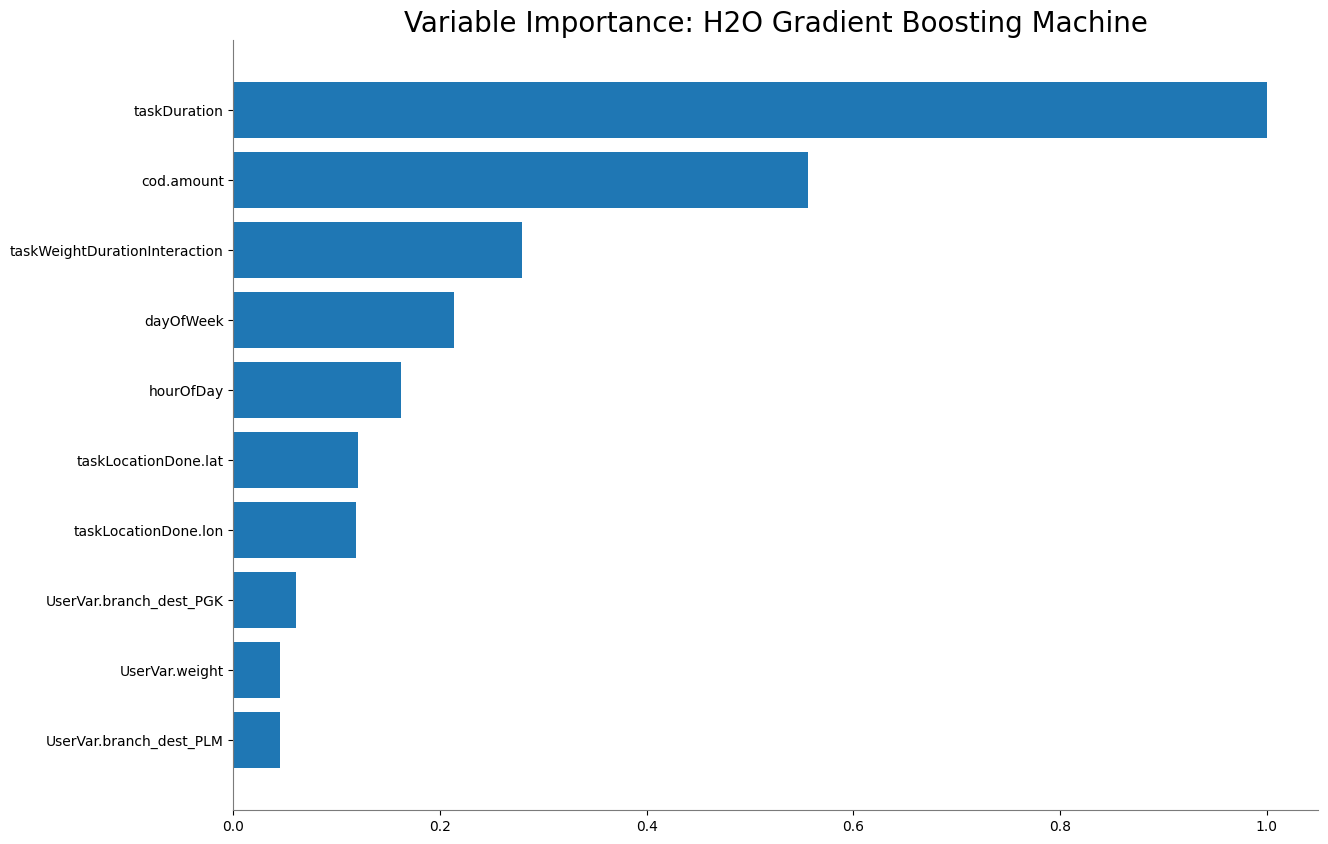

<Figure size 640x480 with 0 Axes>

In [90]:
m.varimp_plot(num_of_features=10)

As we can see in the the Variable Importance plot, the top vars are much the same as they were in the [Feature Selection](#4.-feature-selection) part.

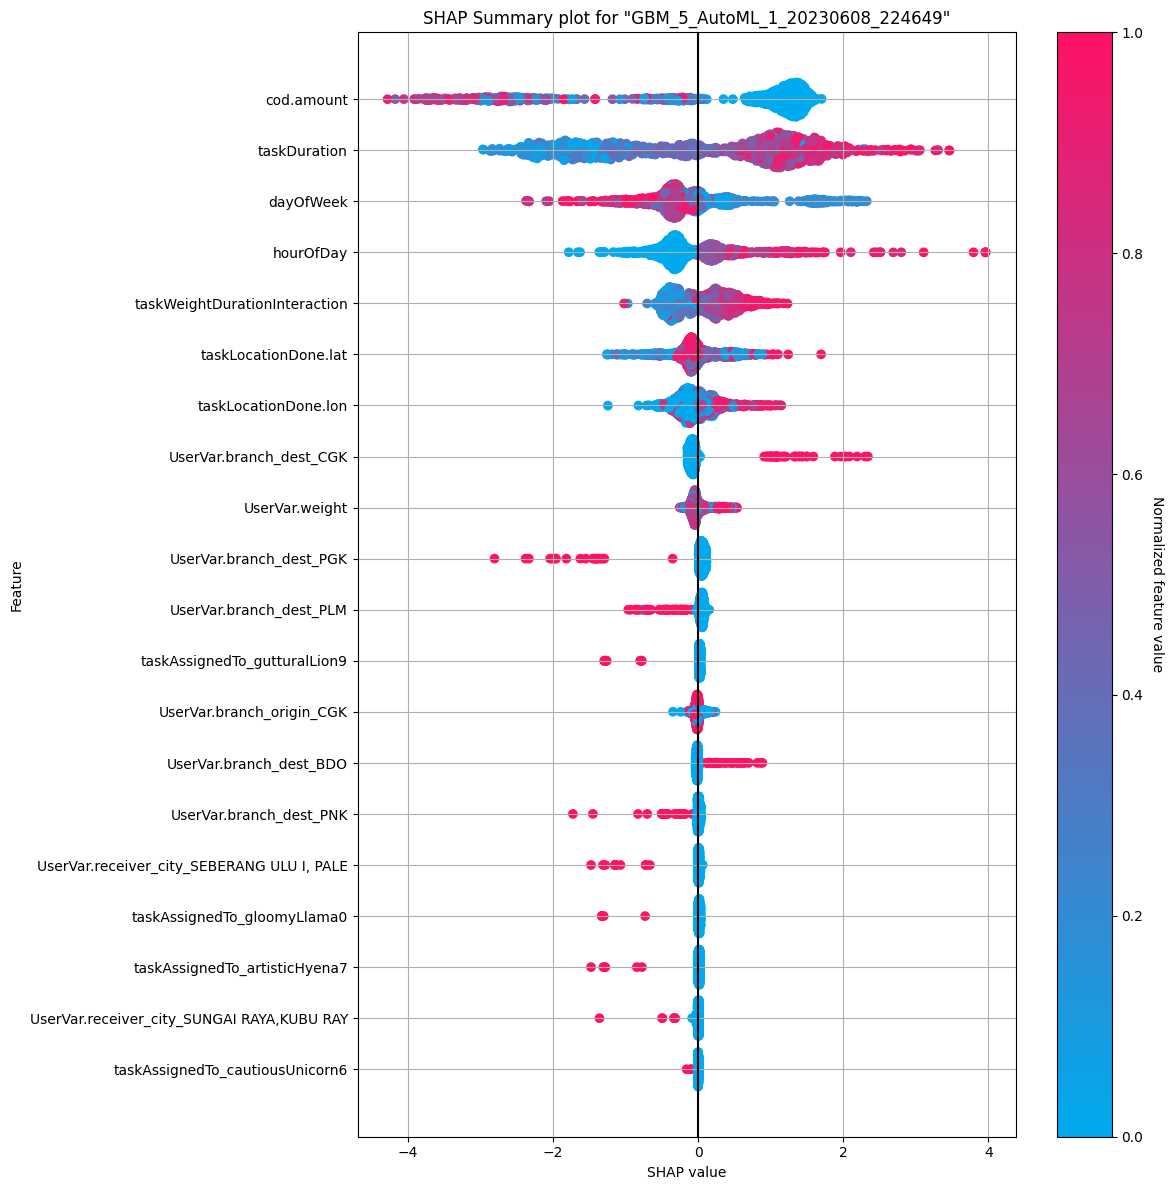

In [91]:
m.shap_summary_plot(valid)

# References

https://www.kaggle.com/code/andreshg/churn-prediction-0-99-auc-h2o-sklearn-smote/notebook#4.-Feature-Selection